In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
grades_22_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/2022 grades dataset.csv")
grades_23_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/2023 grades dataset.csv")

mean_grades_nationwide_2022 = 63.135942686136694
mean_grades_nationwide_2023 = 65.47512372896757

# Calculate the variance for each year
variance_2022 = ((grades_22_all['Percentage'] - mean_grades_nationwide_2022) ** 2).mean()
variance_2023 = ((grades_23_all['percentage'] - mean_grades_nationwide_2023) ** 2).mean()

# Calculate the standard deviation for each year
std_2022 = np.sqrt(variance_2022)
std_2023 = np.sqrt(variance_2023)

Read and Merge Datasets

In [5]:
grades_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/Cleaned Data/Copy of Grades_by_Governorate.csv")
gdp_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/Cleaned Data/GDP_by_Governorate.csv")
health_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/Cleaned Data/Health_by_Governorate.csv")
education_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/Cleaned Data/Education_by_Governorate.csv")
wages_df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/Cleaned Data/Wages_by_Governorate.csv")

wages_df.columns = ['Governorate', 'Total_Avg_Work_Hours', 'Total_Avg_Salary',
       'Total_Count', 'Female_Avg_Work_Hours', 'Female_Avg_Salary',
       'Female_Count', 'Male_Avg_Work_Hours', 'Male_Avg_Salary', 'Male_Count']

merged_df = pd.merge(gdp_df, grades_df, on='Governorate', how='inner')
merged_df = pd.merge(merged_df, health_df, on='Governorate', how='inner')
merged_df = pd.merge(merged_df, education_df, on='Governorate', how='inner')
merged_df = pd.merge(merged_df, wages_df, on='Governorate', how='inner')

In [6]:
print(merged_df.columns)
print(merged_df.shape)

Index(['Governorate', 'Agriculture', 'Crude Petroleum Extraction',
       'Other extractions', 'Petroleum Refinement', 'Manufacturing Industries',
       'Electricity and Gas', 'Water', 'Sewerage', 'Waste Recycling',
       'Construction', 'Whole sale and Retail Trade', 'Communication',
       'Information', 'Transportation and Storage',
       'Accommodation and Food Service Activities', 'Real Estate Ownership',
       'Business Services', 'Education', 'Health', 'Other Services',
       'Non Financial Corporations', 'Financial Corporations',
       'General Government',
       'Non Profit Institutions Serving House hold Sector', 'DomesticWorkers',
       'Total Governorate GDP', 'Literature_2022', 'Math_2022', 'Science_2022',
       'total_mean_2022', 'Literature_2023', 'Math_2023', 'Science_2023',
       'total_mean_2023', 'Population', 'Hospitals_numbers', 'Beds_numbers',
       'Intensive_Care_Beds_numbers', 'Incubators_numbers',
       'Dialysis_Devices_numbers', 'Respirators_numb

## High School Grades Analysis

In [7]:
merged_df['Literature_avg'] = merged_df[['Literature_2022', 'Literature_2023']].mean(axis=1)
merged_df['Math_avg'] = merged_df[['Math_2022', 'Math_2023']].mean(axis=1)
merged_df['Science_avg'] = merged_df[['Science_2022', 'Science_2023']].mean(axis=1)
merged_df['total_mean_avg'] = merged_df[['total_mean_2022', 'total_mean_2023']].mean(axis=1)

Sort Data by 2023 Average *Grades*

In [8]:
merged_df.sort_values(by=['total_mean_2023'],ascending=False, inplace=True)

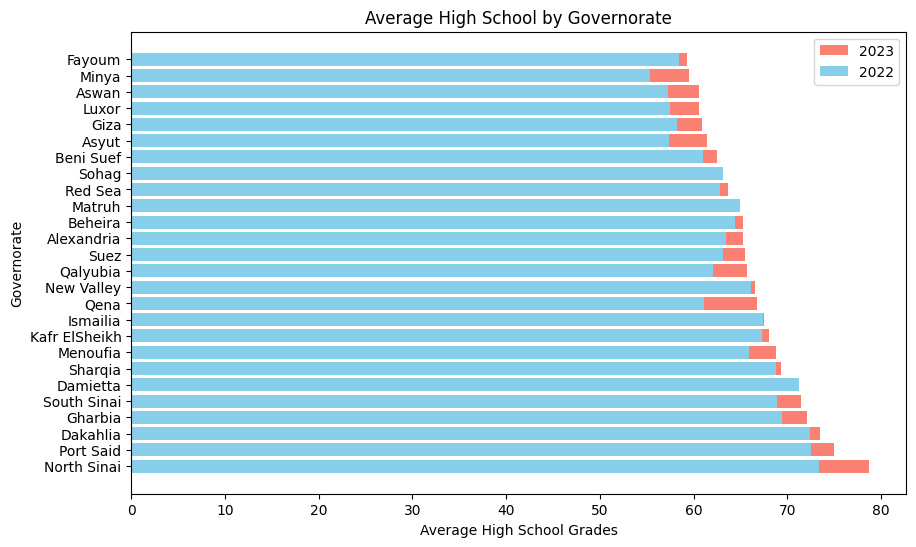

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(merged_df['Governorate'], merged_df['total_mean_2023'], color='salmon', label="2023")
plt.barh(merged_df['Governorate'], merged_df['total_mean_2022'], color='skyblue',label="2022")
plt.xlabel('Average High School Grades')
plt.ylabel('Governorate')
plt.title('Average High School by Governorate')
plt.legend()
plt.show()

### Average Total Grades by Governorate in 2022 and 2023

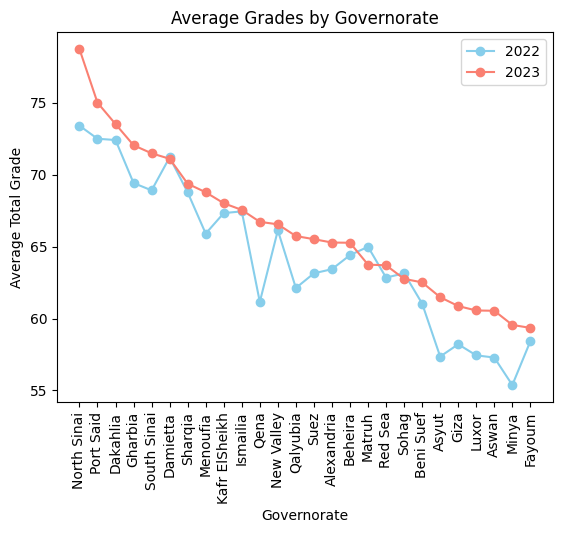

In [10]:
merged_df = merged_df.sort_values(by="total_mean_2023",ascending=False)
plt.plot(merged_df['Governorate'], merged_df['total_mean_2022'], marker='o', linestyle='-', color='skyblue',label="2022")
plt.plot(merged_df['Governorate'], merged_df['total_mean_2023'], marker='o', linestyle='-', color='salmon',label="2023")

plt.title('Average Grades by Governorate')
plt.xlabel('Governorate')
plt.ylabel('Average Total Grade')
plt.xticks(rotation=90)
plt.legend()
print()

### Average Grades by Section from 2022 to 2023

Math Section

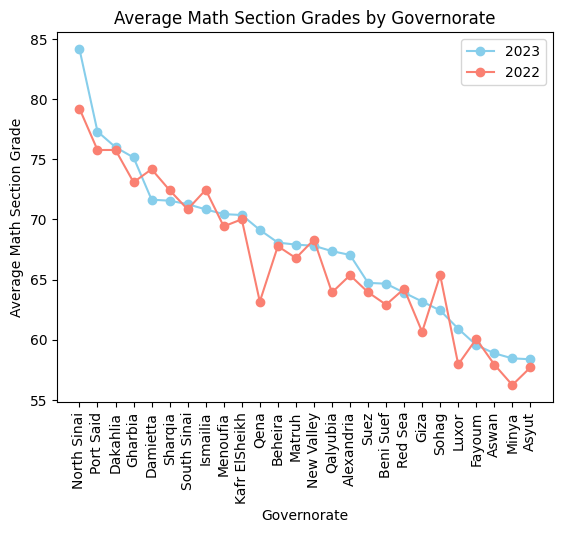

In [11]:
merged_df.sort_values(by="Math_2023",inplace=True,ascending = False)
plt.plot(merged_df['Governorate'], merged_df['Math_2023'], marker='o', linestyle='-', color='skyblue',label="2023")
plt.plot(merged_df['Governorate'], merged_df['Math_2022'], marker='o', linestyle='-', color='salmon',label="2022")

plt.title('Average Math Section Grades by Governorate')
plt.xlabel('Governorate')
plt.ylabel('Average Math Section Grade')
plt.xticks(rotation=90)
plt.legend()

print()

Science Section

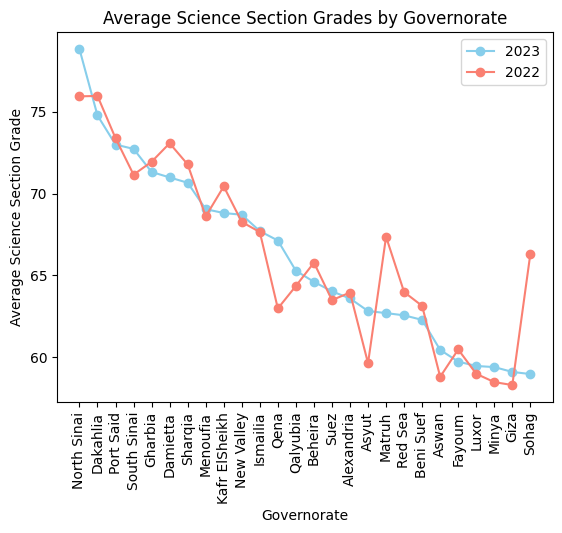

In [12]:
merged_df.sort_values(by="Science_2023",inplace=True,ascending = False)
plt.plot(merged_df['Governorate'], merged_df['Science_2023'], marker='o', linestyle='-', color='skyblue',label="2023")
plt.plot(merged_df['Governorate'], merged_df['Science_2022'], marker='o', linestyle='-', color='salmon',label="2022")

plt.title('Average Science Section Grades by Governorate')
plt.xlabel('Governorate')
plt.ylabel('Average Science Section Grade')
plt.xticks(rotation=90)
plt.legend()
print()

Literature Section

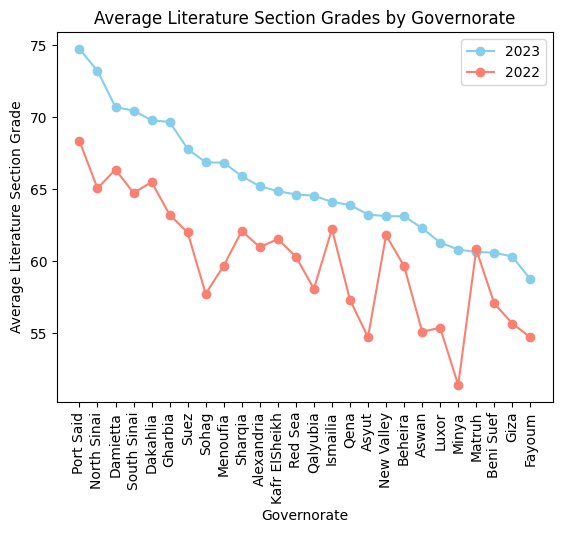

In [13]:
merged_df.sort_values(by="Literature_2023",inplace=True,ascending = False)

plt.plot(merged_df['Governorate'], merged_df['Literature_2023'], marker='o', linestyle='-', color='skyblue',label="2023")
plt.plot(merged_df['Governorate'], merged_df['Literature_2022'], marker='o', linestyle='-', color='salmon',label="2022")

plt.title('Average Literature Section Grades by Governorate')
plt.xlabel('Governorate')
plt.ylabel('Average Literature Section Grade')
plt.xticks(rotation=90)

plt.legend()
print()

### Difference From mean grades

In [14]:
# Calculate the Z-scores for 2022 grades
merged_df['zscore_2022'] = (merged_df['total_mean_2022'] - mean_grades_nationwide_2022) / std_2022

# Calculate the Z-scores for 2023
merged_df['zscore_2023'] = (merged_df['total_mean_2023'] - mean_grades_nationwide_2023) / std_2023


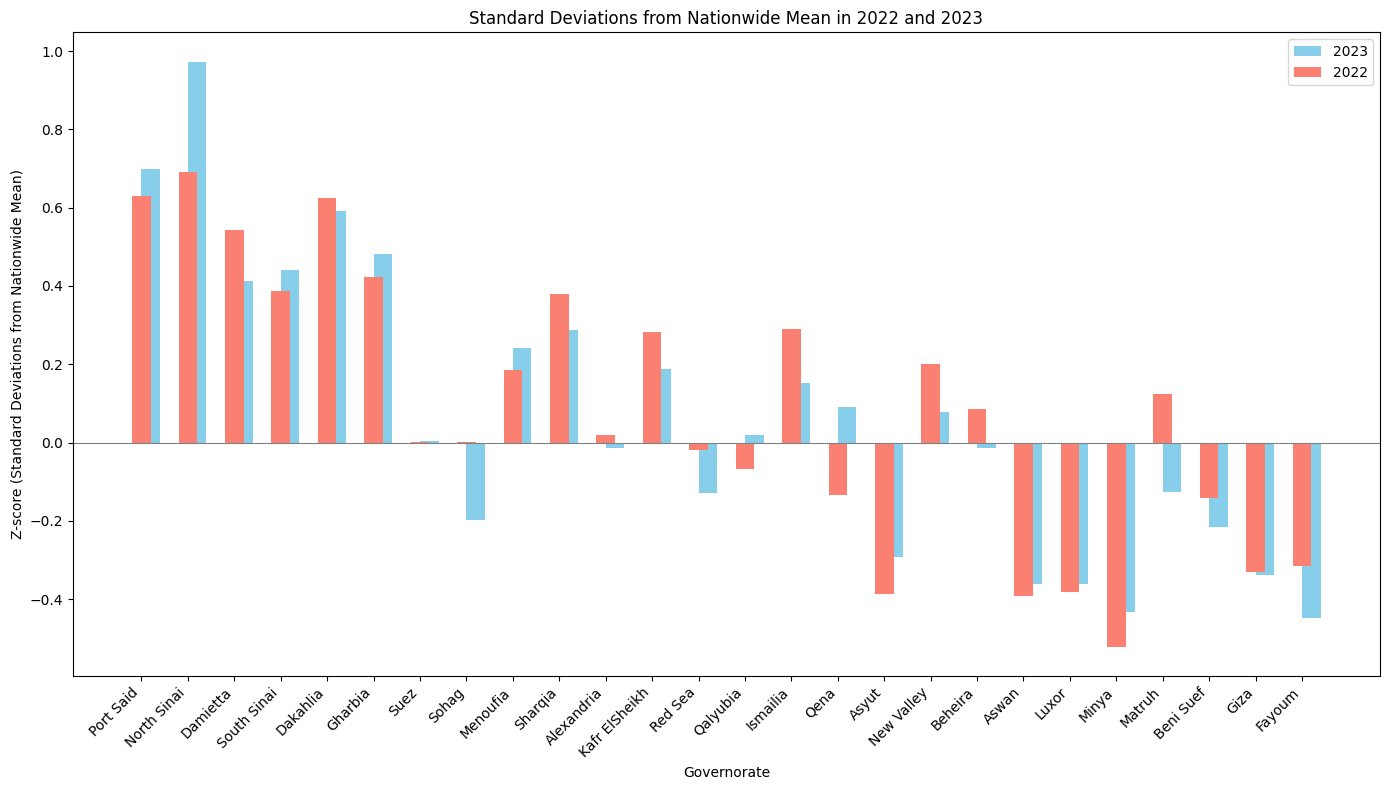

In [15]:

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the Z-scores for 2023 (offset by 0.4 to avoid overlap)
ax.bar(merged_df['Governorate'], merged_df['zscore_2023'],color = "skyblue", width=0.4, label='2023', align='edge')

# Plot the Z-scores for 2022
ax.bar(merged_df['Governorate'], merged_df['zscore_2022'],color = "salmon", width=0.4, label='2022', align='center')


# Add a horizontal line at y=0 to indicate the nationwide mean
ax.axhline(0, color='gray', linewidth=0.8)

# Add labels and title
ax.set_xlabel('Governorate')
ax.set_ylabel('Z-score (Standard Deviations from Nationwide Mean)')
ax.set_title('Standard Deviations from Nationwide Mean in 2022 and 2023')
ax.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Distribution

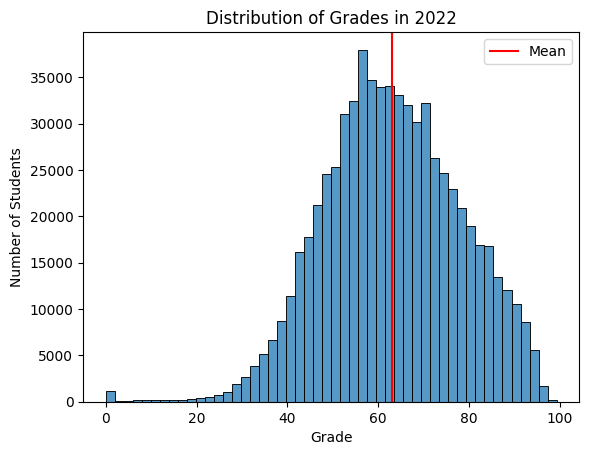

In [16]:
sns.histplot(data=grades_22_all, x="Percentage", bins=50)

# Add labels and title
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.title("Distribution of Grades in 2022")

# Add a vertical line for the mean
mean_grade = mean_grades_nationwide_2022
plt.axvline(mean_grade, color='r', label="Mean")

# Show the plot
plt.legend()
plt.show()

## GDP per Governorate

Merge population with gdp


In [17]:
economic_activities = ['Agriculture', 'Crude Petroleum Extraction', 'Other extractions', 'Petroleum Refinement',
                       'Manufacturing Industries', 'Electricity and Gas', 'Water', 'Sewerage', 'Waste Recycling',
                       'Construction', 'Whole sale and Retail Trade', 'Communication', 'Information', 'Transportation and Storage',
                       'Accommodation and Food Service Activities', 'Real Estate Ownership', 'Business Services', 'Education',
                       'Health', 'Other Services', 'Financial Corporations',
                       'General Government', 'DomesticWorkers','Total Governorate GDP']

for activity in economic_activities:
  merged_df[activity] = merged_df[activity] / merged_df['Population']

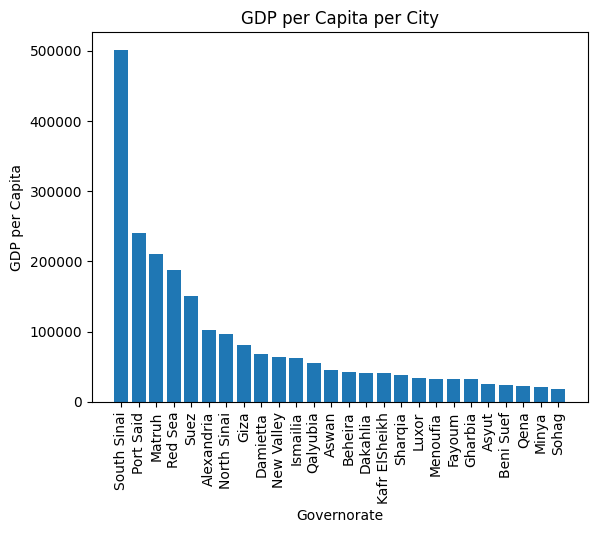

In [18]:
merged_df = merged_df.sort_values(by = "Total Governorate GDP",ascending=False)
plt.bar(merged_df['Governorate'], merged_df['Total Governorate GDP'])

# Add labels and title
plt.xlabel("Governorate")
plt.ylabel("GDP per Capita")
plt.title("GDP per Capita per City")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

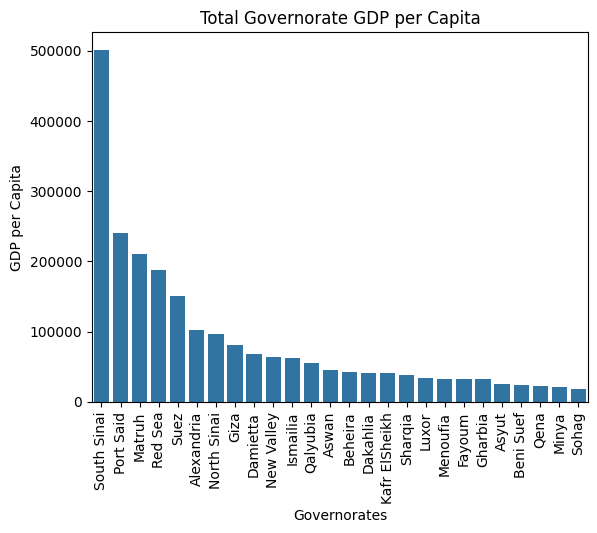

In [19]:
# Create the bar plot
sns.barplot(x=merged_df['Governorate'], y=merged_df['Total Governorate GDP'])

# Add labels and title
plt.xlabel("Governorates")
plt.ylabel("GDP per Capita")
plt.title("Total Governorate GDP per Capita")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

Calculate the correlations and select the top N factors:

In [20]:

relevant_columns = [
    'Agriculture','Other extractions',
    'Petroleum Refinement', 'Manufacturing Industries', 'Electricity and Gas',
    'Water', 'Sewerage', 'Waste Recycling', 'Construction',
    'Whole sale and Retail Trade', 'Communication',
    'Transportation and Storage',
    'Real Estate Ownership', 'Business Services', 'Education', 'Health',
    'Other Services', 'Non Financial Corporations', 'Financial Corporations',
    'General Government', 'Non Profit Institutions Serving House hold Sector',
    'DomesticWorkers', 'Total Governorate GDP', 'Hospitals_numbers','Literature_avg', 'Math_avg',
    'Science_avg', 'total_mean_avg','zscore_2022','zscore_2023'
]
# Calculate the correlation matrix
corr_matrix = merged_df[relevant_columns].corr()

# Define target columns
target_columns = ['Literature_avg', 'Math_avg', 'Science_avg', 'total_mean_avg','zscore_2022','zscore_2023']

# Define the number of top factors to select
top_n = 5

# Dictionary to store top factors for each target
top_factors = {}
for target in target_columns:
    # Sort correlations with other columns for the target column
    correlations = corr_matrix[target].abs().sort_values(ascending=False)
    # Select top correlated factors excluding target_columns
    top_factors[target] = [factor for factor in correlations.index if factor not in target_columns][:top_n]

top_factors



{'Literature_avg': ['Transportation and Storage',
  'General Government',
  'Total Governorate GDP',
  'DomesticWorkers',
  'Construction'],
 'Math_avg': ['General Government',
  'Agriculture',
  'Transportation and Storage',
  'Total Governorate GDP',
  'DomesticWorkers'],
 'Science_avg': ['General Government',
  'Agriculture',
  'Total Governorate GDP',
  'Transportation and Storage',
  'Water'],
 'total_mean_avg': ['General Government',
  'Transportation and Storage',
  'Total Governorate GDP',
  'Agriculture',
  'DomesticWorkers'],
 'zscore_2022': ['General Government',
  'Agriculture',
  'Total Governorate GDP',
  'Transportation and Storage',
  'DomesticWorkers'],
 'zscore_2023': ['General Government',
  'Transportation and Storage',
  'Total Governorate GDP',
  'Agriculture',
  'DomesticWorkers']}

Plot the correlation heatmap for the selected columns




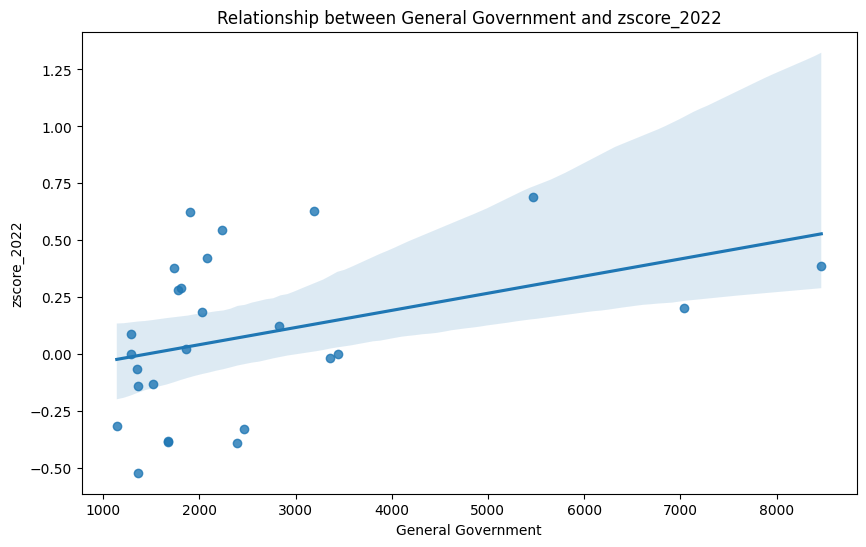

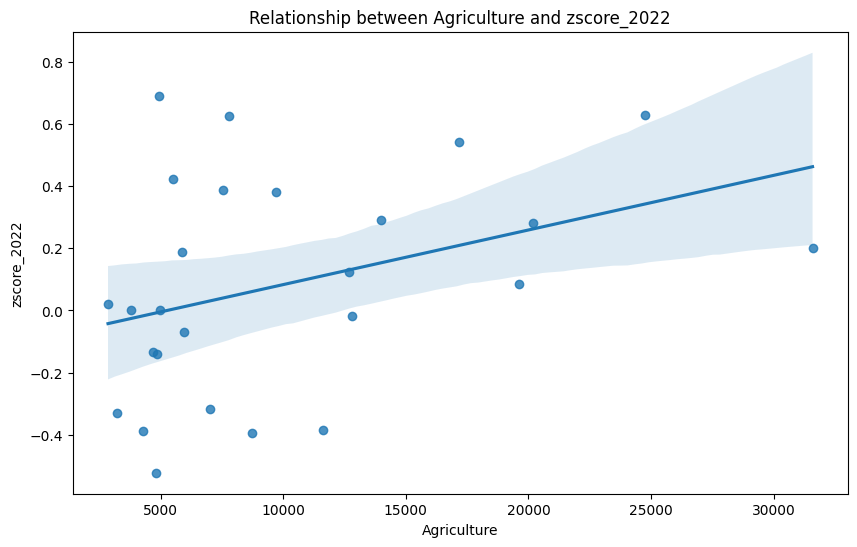

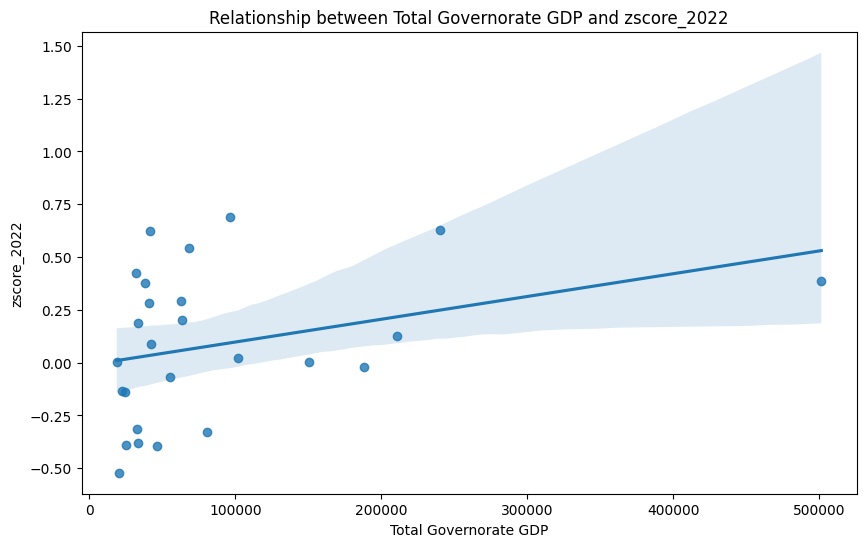

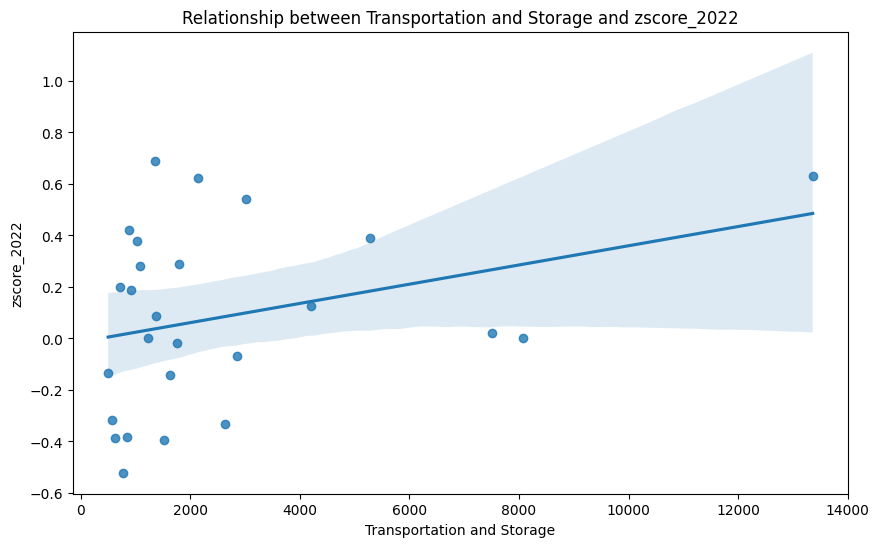

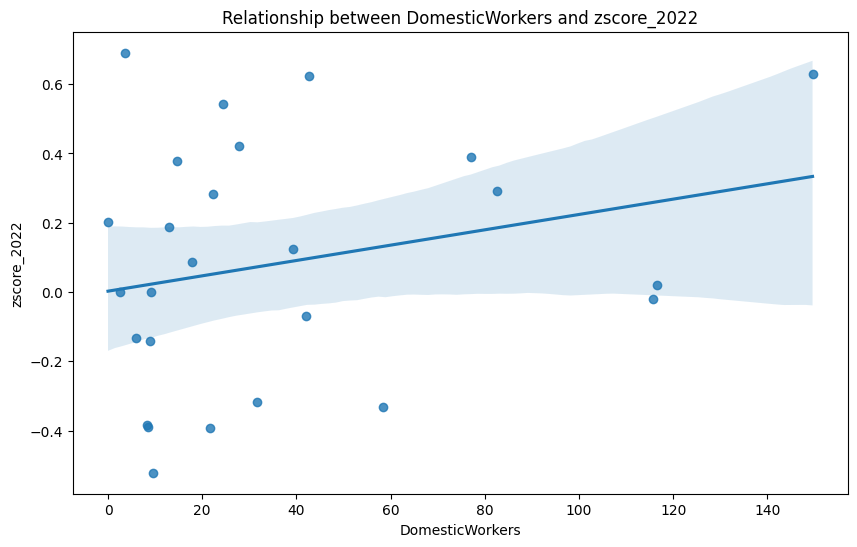

In [21]:
target = "zscore_2022"
for factor in top_factors[target]:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=factor, y=target, data=merged_df)
    plt.title(f'Relationship between {factor} and {target}')
    plt.xlabel(factor)
    plt.ylabel(target)
    plt.show()


In [22]:


# Scatter plot for 2022
plt.figure(figsize=(10, 6))
print(merged_df_2022.columns)
# Scatter plot for 2022
sns.regplot(x='Total Governorate GDP', y='total_mean', data=merged_df_2022, scatter_kws={'alpha':0.5}, label='2022')

# Scatter plot for 2023
sns.regplot(x='Total Governorate GDP', y='total_mean', data=merged_df_2023, scatter_kws={'alpha':0.5}, label='2023')

# Add labels and legend
plt.title('Scatter Plot of Mean Grade vs GDP per Capita (2022 vs 2023)')
plt.xlabel('GDP per Capita')
plt.ylabel('Mean Grade')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'merged_df_2022' is not defined

<Figure size 1000x600 with 0 Axes>

In [23]:
print("────────────▄▀░░░░░▒▒▒█─")
print("───────────█░░░░░░▒▒▒█▒█")
print("──────────█░░░░░░▒▒▒█▒░█")
print("────────▄▀░░░░░░▒▒▒▄▓░░█")
print("───────█░░░░░░▒▒▒▒▄▓▒░▒▓")
print("──────█▄▀▀▀▄▄▒▒▒▒▓▀▒░░▒▓")
print("────▄▀░░░░░░▒▀▄▒▓▀▒░░░▒▓")
print("───█░░░░░░░░░▒▒▓▀▒░░░░▒▓")
print("───█░░░█░░░░▒▒▓█▒▒░░░▒▒▓")
print("────█░░▀█░░▒▒▒█▒█░░░░▒▓▀")
print("─────▀▄▄▀▀▀▄▄▀░█░░░░▒▒▓─")
print("───────────█▒░░█░░░▒▒▓▀─")
print("────────────█▒░░█▒▒▒▒▓──")
print("─────────────▀▄▄▄▀▄▄▀─")

────────────▄▀░░░░░▒▒▒█─
───────────█░░░░░░▒▒▒█▒█
──────────█░░░░░░▒▒▒█▒░█
────────▄▀░░░░░░▒▒▒▄▓░░█
───────█░░░░░░▒▒▒▒▄▓▒░▒▓
──────█▄▀▀▀▄▄▒▒▒▒▓▀▒░░▒▓
────▄▀░░░░░░▒▀▄▒▓▀▒░░░▒▓
───█░░░░░░░░░▒▒▓▀▒░░░░▒▓
───█░░░█░░░░▒▒▓█▒▒░░░▒▒▓
────█░░▀█░░▒▒▒█▒█░░░░▒▓▀
─────▀▄▄▀▀▀▄▄▀░█░░░░▒▒▓─
───────────█▒░░█░░░▒▒▓▀─
────────────█▒░░█▒▒▒▒▓──
─────────────▀▄▄▄▀▄▄▀─
